In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [173]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [174]:
number_of_samples = 50000

In [175]:
data_attack = pd.read_csv('/content/drive/MyDrive/Dataset/attack.csv', nrows = number_of_samples)

In [176]:
data_normal = pd.read_csv('/content/drive/MyDrive/Dataset/normal.csv', nrows = number_of_samples)

In [177]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [178]:
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)

In [179]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [180]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [181]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [182]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1


In [183]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [184]:

X.shape

(100000, 25)

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size = 0.2)

In [186]:
def create_baseline():
    model = Sequential()
    
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    #model.add(LSTM(64, activation='tanh', kernel_regularizer='l2'))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [187]:
model = create_baseline()

In [188]:
print(Y_train.dtype)

object


In [189]:
Y_train[0:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=object)

In [190]:
X_train[0:10]

array([[[ 1.37223278,  0.03422529,  1.37179741, ..., -0.12972475,
         -0.29885158, -0.06761984],
        [ 1.37223278,  0.03422529,  1.37179741, ..., -0.12972475,
         -0.29885158, -0.06795642],
        [-0.8596244 ,  0.03422529, -0.86468778, ..., -0.12972475,
          0.25252757, -0.06799519],
        ...,
        [-0.8596244 ,  0.03422529, -0.86468778, ..., -0.12972475,
          0.25252757, -0.06799549],
        [-0.31010248,  0.03422529, -0.30709832, ..., -0.12972475,
         -0.29885158, -0.06795704],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 1.24943459,  0.03422529,  1.24925028, ..., -0.12972475,
          2.88556117, -0.06583725],
        [ 1.24943459,  0.03422529,  1.24925028, ..., -0.12972475,
          2.88556117, -0.06684484],
        [ 0.06443201,  0.03422529,  0.06667044, ..., -0.12972475,
         -0.71194554, -0.06799734],
        ...,
        [ 0.06443201,  0.03422529,  0.06667044, ..., -

In [191]:
Y_train = np.asarray(Y_train).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

In [192]:
history = model.fit(X_train, Y_train, epochs = 40,validation_split=0.2, verbose = 1)

Epoch 1/40
2000/2000 [==============================] - 48s 22ms/step - loss: 0.5273 - accuracy: 0.9135 - val_loss: 0.1982 - val_accuracy: 0.9428
Epoch 2/40
2000/2000 [==============================] - 44s 22ms/step - loss: 0.1809 - accuracy: 0.9530 - val_loss: 0.1534 - val_accuracy: 0.9632
Epoch 3/40
2000/2000 [==============================] - 44s 22ms/step - loss: 0.1590 - accuracy: 0.9613 - val_loss: 0.1464 - val_accuracy: 0.9641
Epoch 4/40
2000/2000 [==============================] - 44s 22ms/step - loss: 0.1570 - accuracy: 0.9614 - val_loss: 0.1523 - val_accuracy: 0.9611
Epoch 5/40
2000/2000 [==============================] - 44s 22ms/step - loss: 0.1390 - accuracy: 0.9666 - val_loss: 0.1495 - val_accuracy: 0.9637
Epoch 6/40
2000/2000 [==============================] - 43s 22ms/step - loss: 0.1370 - accuracy: 0.9663 - val_loss: 0.1476 - val_accuracy: 0.9549
Epoch 7/40
2000/2000 [==============================] - 44s 22ms/step - loss: 0.1355 - accuracy: 0.9658 - val_loss: 0.1257 -

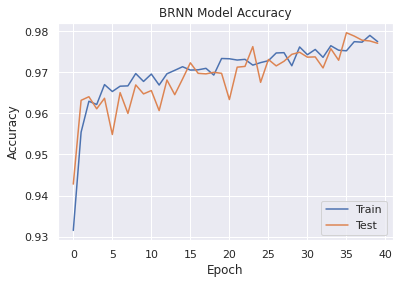

In [193]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN Model Accuracy.png')
plt.show()

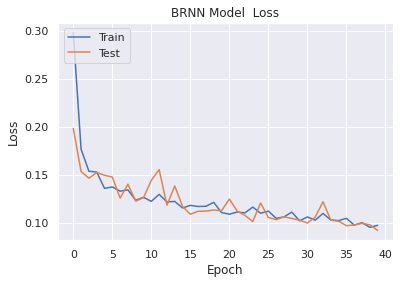

In [194]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()

In [195]:
predict = model.predict(X_test, verbose=1)

625/625 [==============================] - 4s 6ms/step


In [196]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1


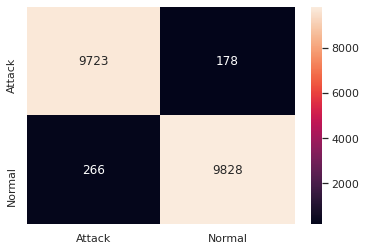

In [197]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [200]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.78%
